# Fetch Dataset

In [1]:
!curl -s https://rasmuspagh.net/data/glove.twitter.27B.100d.names.pickle -O

# Imports

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [3]:
input_file = "glove.twitter.27B.100d.names.pickle"

with open(input_file, 'rb') as f:
    embedding = pickle.load(f)

names = list(embedding.keys())
points = np.array([ embedding[x] for x in names ])
n, d = points.shape

## Assert Norm

In [4]:
np.all(np.linalg.norm(points, ord=2, axis=1) <= 1.0001) # floats are imprecise, so <= 1.0 fails

np.True_

# Private implementation of cost computation and k-means algorithm

In [5]:
def compute_cost(points, centers):
    distances_squared = np.sum((points - centers[:,np.newaxis])**2, axis=-1)
    return np.mean(np.min(distances_squared, axis=0))


# initalize random number generator
rand = np.random.default_rng(seed=42)


def k_means(points, k, t, rho):
    initial_assignment = np.random.choice(range(k), n)
    cluster_indexes = [ (initial_assignment == i) for i in range(k) ]
    cluster_sizes = [ cluster_indexes[i].sum() for i in range(k) ]

    sigma = sigma_prime = np.sqrt(3 * t / rho)

    for l in range(t):
        # (a)
        z = rand.normal(0, sigma, (k, d))
        cluster_sums = [ np.sum(points[cluster_indexes[i]], axis=0) + z[i,:] for i in range(k) ]
        centers = np.array([ cluster_sums[i] / max(1, cluster_sizes[i]) for i in range(k) ])

        # (b)
        distances_squared = np.sum((points - centers[:,np.newaxis])**2, axis=-1)
        assignment = np.argmin(distances_squared, axis=0)
        cluster_indexes = [ (assignment == i) for i in range(k) ]

        # (c)
        z_prime = rand.normal(0, sigma_prime, k)
        cluster_sizes = [ cluster_indexes[i].sum() + z_prime[i] for i in range(k) ]

    return centers

# Plot cost as function of number of iterations

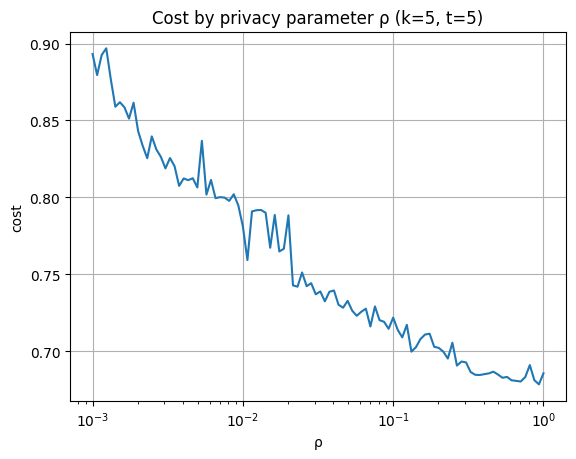

In [6]:
k = 5 # Number of clusters
t = 5 # Number of iterations

fig, ax = plt.subplots()
ax.set_xlabel('ρ')
ax.set_ylabel('cost')

rhos = np.logspace(-3, 0, 100)

costs = []
for rho in rhos:
    centers = k_means(points, k, t, rho)
    costs.append(compute_cost(points, centers))

ax.plot(rhos, costs)

plt.xscale('log')
plt.grid()
plt.title(f"Cost by privacy parameter ρ (k={k}, t={t})")
plt.show()
